In [2]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
pd.read_sql_query("select * from sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
pd.read_sql_query("select * from facts limit 5", conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [4]:
pd.read_sql_query("select min(population), max(population)," +
                  "min(population_growth), max(population_growth)" +
                  "from facts", conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


In [15]:
pd.read_sql_query("select name from facts where population = (select min(population) from facts)", conn)

,name
0,Antarctica


In [14]:
pd.read_sql_query("select name from facts where population = (select max(population) from facts)", conn)

,name
0,World


## Observations:
We notice that Antarctica has a population of 0 people. Antarctica itself is not a country, rather an international location where research is conducted. It's population ranges between 200 and 1000 from winter to summer, respectively. 

"World" has a population of more than 7.2 billion. This reflects the population of the whole world, and not a single country.

In [13]:
hist_data = pd.read_sql_query("select population, population_growth, birth_rate, death_rate " +
                              "from facts " +
                              "where population != (select max(population) from facts) " +
                              "and population != (select min(population) from facts)", conn)

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f960581bfd0>,
      dtype=object)

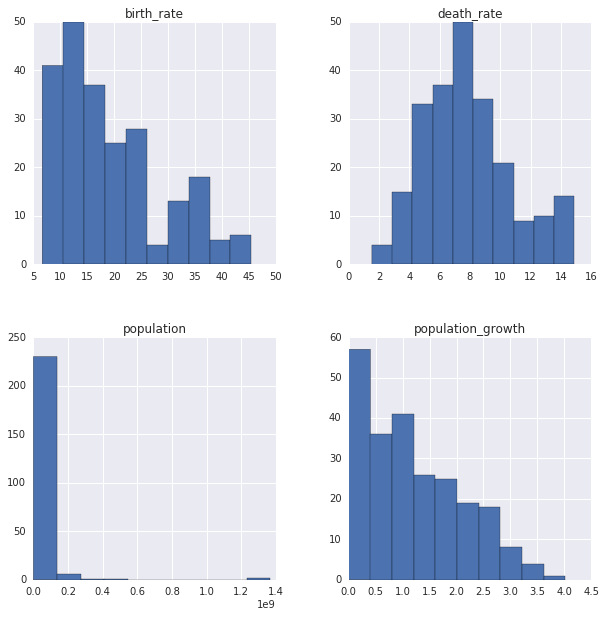

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

hist_data.hist(ax=ax)

# Population density

In [24]:
pd.read_sql_query("select name, cast(population as float) / cast(area as float) as highest_pop_den " +
                              "from facts order by highest_pop_den desc limit 5", conn)

,name,highest_pop_den
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96051ddbe0>],
      dtype=object)

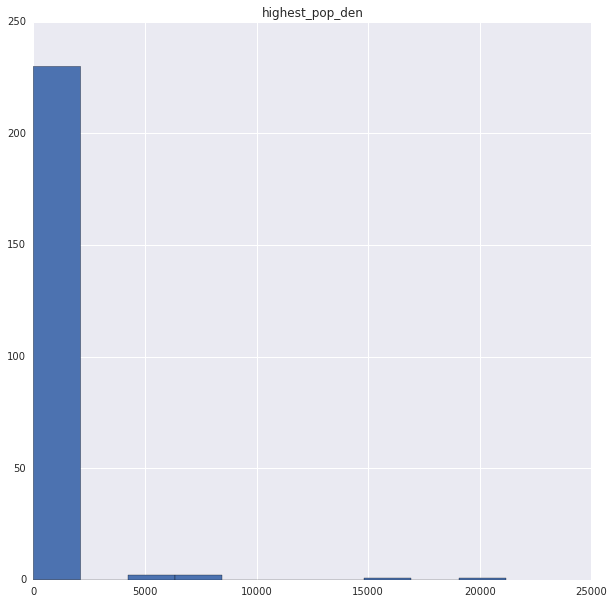

In [26]:
pop_density = pd.read_sql_query("select name, cast(population as float) / cast(area as float) as highest_pop_den " +
                              "from facts order by highest_pop_den desc", conn)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

pop_density.hist(ax=ax)